In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.patches import Ellipse
import matplotlib.patches as patches
import librosa

%run graphing_function_recent.ipynb

In [2]:
#Use this for all adjustable values 
#input file paths here (include .csv):
video_path = r'\\10.25.16.5\yaochen\Active\DLC\Final_Models\Lindsey\escape_behavior_2-lindsey_christinger-2024-06-13_v1\D1D2\coords_csv\CoordM6_07-17-24_control_P2_videoDLC_resnet50_escape_behavior_2Jun13shuffle1_1030000_filtered_day.csv'
time_path = r'\\10.25.16.5\yaochen\Active\Hanna\Escape_behavior\round2_HannaEscapeBehavior\videoTimestamp\M6_07-17-24_control_P2_videoTimestamp0.csv'
audio_path = r'\\10.25.16.5\yaochen\Active\Hanna\Escape_behavior\round2_HannaEscapeBehavior\stimulusTimestamp\M6_07-17-24_control_P2_stimulusTimestamp0.csv'

north_pixel = 126
south_pixel = 445
east_pixel = 485
west_pixel = 143
shelter_x_pixel = 458
shelter_y_pixel = 302

#estimate for when mouse reaches shelter
escape_done = 1.7 #time mouse reaches shelter location

In [3]:
#manually decide?
escape_response = True
freezing_response = False
##small_angle = 

In [4]:
sigma = 2

In [5]:
#read in DLC data, convert to cm, center platform at 0,0
#return converted coordinates for all 
shelter_x, shelter_y, x_diam, y_diam, coords = single_mouse_data(north_pixel, south_pixel, east_pixel, west_pixel, shelter_x_pixel, shelter_y_pixel, video_path)

In [6]:
#replace any head, nose, or center points with likelihood < .9 with NA
#coords dataframe is filled with NA when LT<.9, coords_scaled has interpolated data (compare in graphs)
coord_scaled = filter_data(.9, coords)

In [7]:
#add time in seconds for both coords (na values) and coord_scaled (interpolated)
#results in given dataframe with time in seconds zeroed at stimulus onset. choose which stimulus to look at
convert_time(time_path, coord_scaled, audio_path, 2)
convert_time(time_path, coords, audio_path, 2)

In [8]:
#calculate displacement as 'displacement'
displacement(shelter_x, shelter_y, coord_scaled)
displacement(shelter_x, shelter_y, coords)

In [9]:
#calculate speed as 'speed' and change in displacement as 'delta_vector'
#return total distance for linearity calculations
total_distance = speed(coord_scaled)
total_distance_coords = speed(coords)

In [10]:
#calculate head angle as 'head_angle'
angle(shelter_x, shelter_y, coord_scaled)
angle(shelter_x, shelter_y, coords)


In [11]:
#calculate head angle speed as 'angle_speed'
angle_speed(coord_scaled)
angle_speed(coords)

In [12]:
#create dataframes isolated to 4 ranges: just shelter reaching, 3 seconds before and 6 after, 2 before and 4 after, and 1 where you can input your own parameters
#return 4 dataframes 
time_range = dataframe_ranges(-4, 8, coord_scaled)
time_range_coords = dataframe_ranges(-7, 8, coords)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

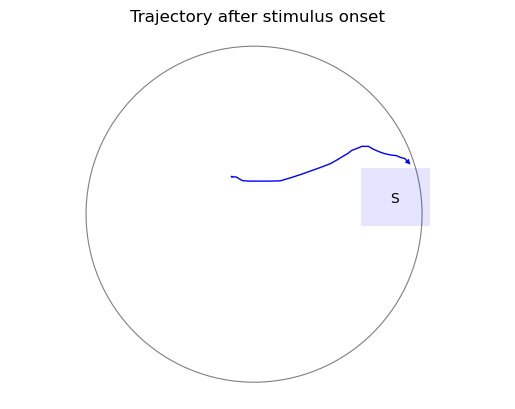

In [13]:
trajectory(shelter_x, shelter_y, x_diam, y_diam, dataframe_ranges(0, escape_done, coord_scaled))

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

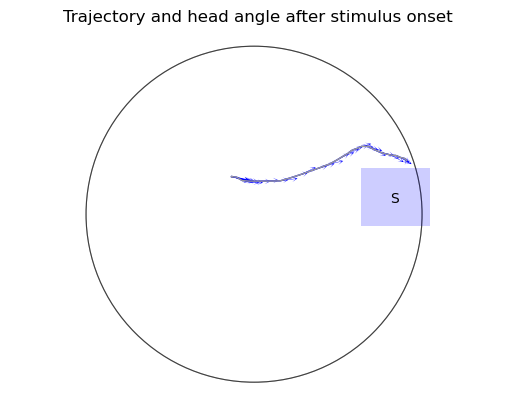

In [14]:
head_angle_trajectory_figure(shelter_x, shelter_y, x_diam, y_diam, dataframe_ranges(0, escape_done, coord_scaled))

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

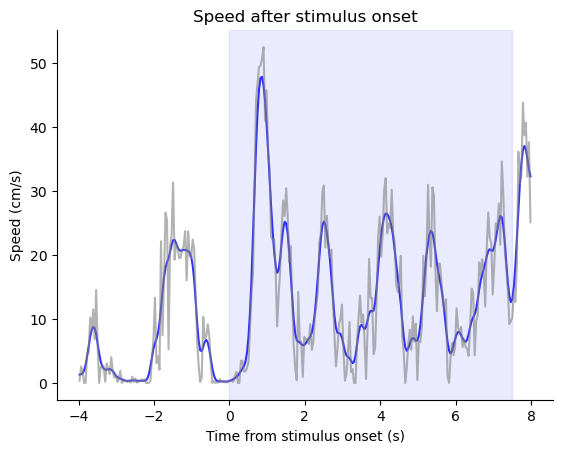

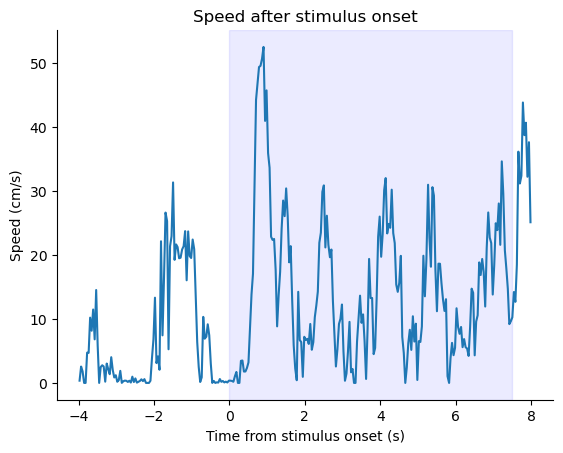

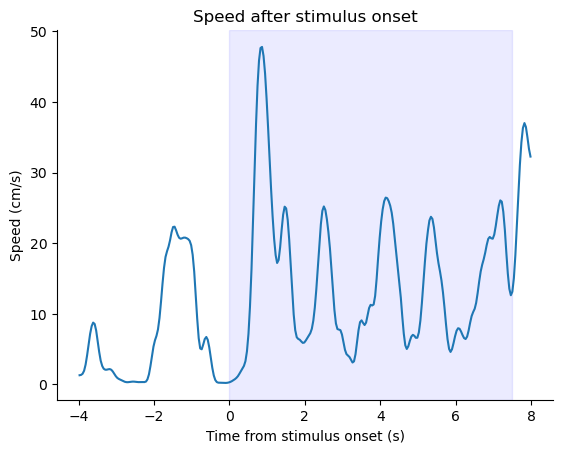

In [15]:
speed_figure(-4, 8, coord_scaled, False, True, sigma)
speed_figure(-4, 8, coord_scaled, False, False, sigma)
speed_figure(-4, 8, coord_scaled, True, False, sigma)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

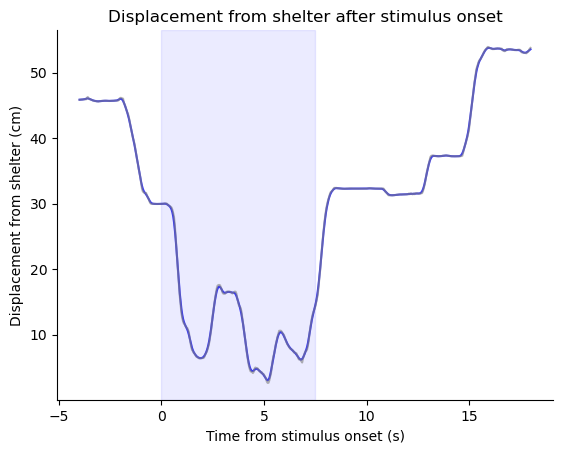

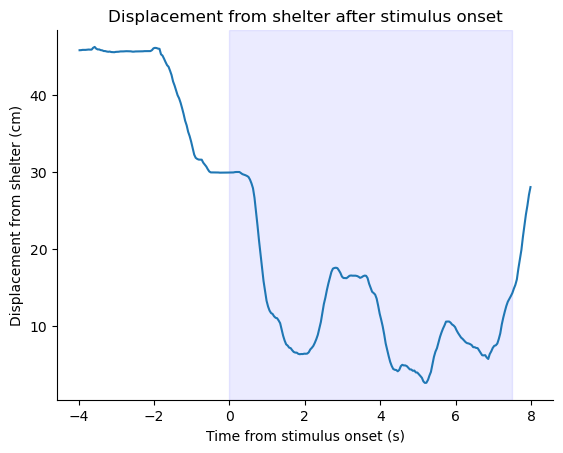

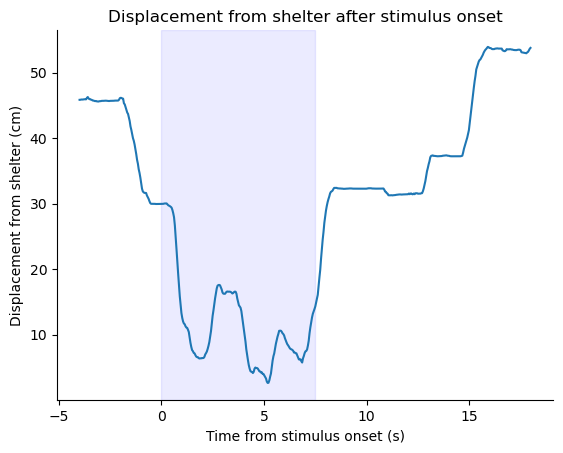

In [16]:
displacement_figure(-4, 18,coord_scaled, False, True, sigma)
displacement_figure(-4, 8, coord_scaled, False, False, sigma)
displacement_figure(-4, 18,coord_scaled, False, False, sigma)


<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

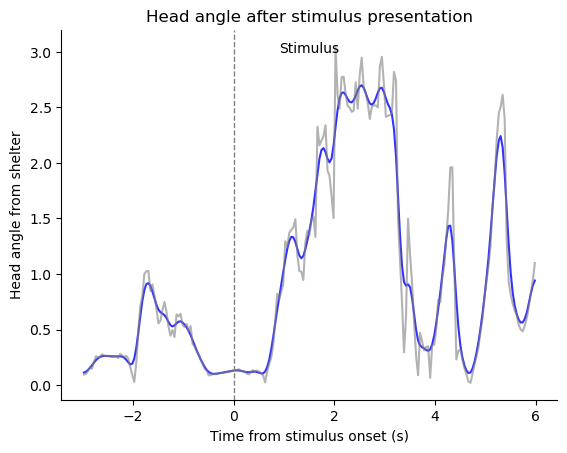

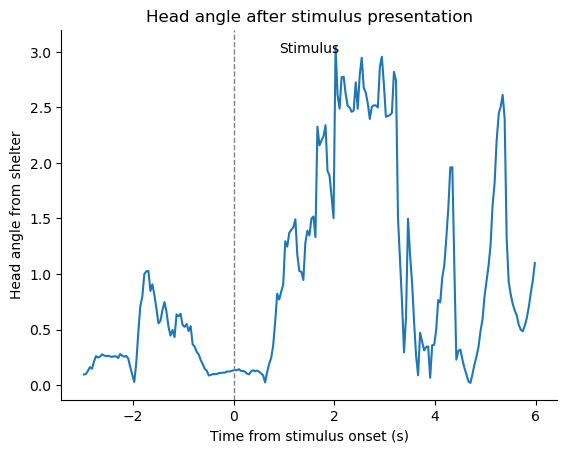

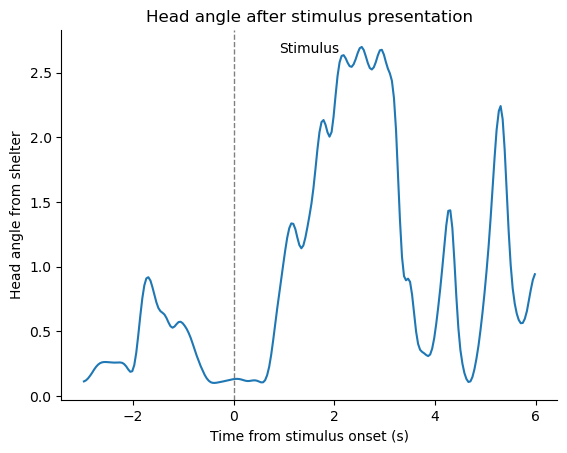

In [17]:
head_angle_figure(-3, 6,coord_scaled, False, True, sigma)
head_angle_figure(-3, 6,coord_scaled, False, False, sigma)
head_angle_figure(-3, 6,coord_scaled, True, True, sigma)


In [18]:
ratio, initial_displacement, total_distance = linearity_ratio(0, escape_done, coord_scaled)

In [19]:
likelihood_data, likelihood_minus_nose, likelihood_center = likelihood_check(0, 8, .9, coords)

In [20]:
likelihood_data #need to adjust time frame to be useful 

,Unnamed: 0,frames,nose_x,nose_y,nose_likelihood,head_x,head_y,head_likelihood,earRight_x,earRight_y,...,spine2_likelihood,spine3_x,spine3_y,spine3_likelihood,time_set,displacement,speed,delta_vector,head_angle,angle_speed
7740,7740,7740,NaN,NaN,0.509466,29.929575,9.875273,0.998962,30.135502,10.708645,...,0.999965,24.038336,10.665444,0.999933,1.623283,7.150394,21.364326,0.849638,NaN,NaN
7741,7741,7741,NaN,NaN,0.086442,30.349180,9.377381,0.998057,30.446575,10.217260,...,0.999922,24.278636,10.229135,0.999963,1.663335,6.882800,12.927941,0.517790,NaN,NaN
7742,7742,7742,NaN,NaN,0.053417,30.453912,9.167555,0.999098,30.512977,10.028237,...,0.999889,24.369641,10.007427,0.999977,1.703347,6.658796,5.868174,0.234797,NaN,NaN
7743,7743,7743,NaN,NaN,0.047010,30.453912,9.167555,0.999142,30.512977,10.028237,...,0.999679,24.369641,9.870815,0.999964,1.744039,6.571748,2.247525,0.091456,NaN,NaN
7744,7744,7744,NaN,NaN,0.236638,30.453912,9.167555,0.999365,30.512977,10.028237,...,0.999709,24.369641,9.833735,0.999941,1.784320,6.564834,0.422349,0.017013,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7850,7850,7850,NaN,NaN,0.163264,31.249174,-6.288088,0.998845,31.250714,-5.568896,...,0.999962,25.720234,-4.696899,0.999971,6.024423,9.467645,11.658881,0.463371,NaN,NaN
7851,7851,7851,NaN,NaN,0.002171,30.889036,-6.288088,0.997638,31.074861,-5.568896,...,0.999972,25.624444,-4.405653,0.999929,6.065216,9.112021,8.718578,0.355657,NaN,NaN
7852,7852,7852,NaN,NaN,0.005061,30.567066,-6.288088,0.997962,30.959346,-5.568896,...,0.999948,25.624444,-3.935807,0.999709,6.104704,8.809322,7.666981,0.302754,NaN,NaN
7853,7853,7853,NaN,NaN,0.015622,29.637314,-6.462148,0.997985,30.443690,-5.950396,...,0.999680,25.624444,-3.165140,0.999875,6.144410,8.524557,8.735879,0.346867,NaN,NaN


In [21]:

rotate, shelter_rotate_x, shelter_rotate_y = align_shelter(shelter_x, shelter_y, 0, escape_done, coord_scaled)
#normalized_df, shelter_normalized_x, shelter_normalized_y, combined_range = normalize_rotation(rotate, shelter_rotate_x, shelter_rotate_y)


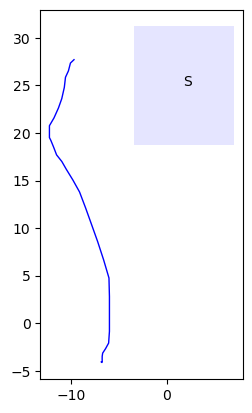

In [22]:

fig = plt.figure()  #create figure to fill in
ax = plt.axes()
    
    #make x and y scales equal - present as a circle


    #plot the center x and y coordinates
x = rotate['rotated_x']
y = rotate['rotated_y']

ax.text(shelter_rotate_x,shelter_rotate_y, 'S', color = 'black', size = 10)
shelter = patches.Rectangle(((shelter_rotate_x - 5.25), (shelter_rotate_y-6.25)), 10.5,12.5,  linewidth = .8, edgecolor = 'none', facecolor = 'blue', alpha = .1)
ax.add_patch(shelter)

ax.set_aspect('equal')
ax.plot(x,y, color = 'blue', linewidth = 1)


In [23]:
coord_scaled_smooth = smooth_curve(sigma, coord_scaled)